Text Analytics I HWS 22/23

# Home Assignment 2 (35 pts)


Submit your solution via Ilias until 23.59pm on Tuesday, November 15th. Late submissions are accepted until 10:15am on the following day (start of the exercise), with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 3-4 students. Unless explicitly agreed otherwise in advance, **submissions from teams with more or less members will NOT be graded**.
List all members of the team with their student ID and full name in the cell below, and submit only one notebook per team. Only submit a notebook, do not submit the dataset(s) you used or image files that you have created - these have to be created from your notebook. Also, do NOT compress/zip your submission!

You may use the code from the exercises and basic functionalities that are explained in the official documentation of Python packages without citing, __all other sources must be cited__. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

#### General guidelines:
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points.
* Use only packages that are automatically installed along with Anaconda, plus some additional packages that have been introduced in the context of this class.
* Ensure that the notebook does not rely on the current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory.
* Make sure you clean up your code before submission, e.g., properly align your code, and delete every line of code that you do not need anymore, even if you may have experimented with it. Minimize usage of global variables. Do not reuse variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Feel free to use comments in the code. While we do not require them to get full marks, they may help us in case your code has minor errors.
* For questions that require a textual answer, please do not write the answer as a comment in a code cell, but in a Markdown cell below the code. Always remember to provide sufficient justification for all answers.
* You may create as many additional cells as you want, just make sure that the solutions to the individual tasks can be found near the corresponding assignment.
* If you have any general question regarding the understanding of some task, do not hesitate to post in the student forum in Ilias, so we can clear up such questions for all students in the course.

In [181]:
team_members = [
    {
        'first_name': 'Pavani',
        'last_name': 'Rajula',
        'student_id': 1870208
    },
    {
        'first_name': 'Yves',
        'last_name': 'Staudenmaier',
        'student_id': 1754294
    },
    {
        'first_name': 'Zeynep',
        'last_name': 'Eroglu',
        'student_id': 1834472
    },
    {
        'first_name': 'Priyanka',
        'last_name': 'Roy',
        'student_id': 1933097
    }
]

In [182]:
from typing import List, Union, Dict, Set, Tuple
from numpy.typing import NDArray

### Task 1: POS tagging (6 points)

In this task, we want to explore sentences with similar part of speech (POS) tag structure. For this, we need a corpus of text with tags. We will generate such a corpus by using NLTK’s currently recommended POS tagger to tag a given list of tokens (https://www.nltk.org/api/nltk.tag.html).

In [183]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pavanirajula/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [184]:
# NLTK's off-the-shelf POS tagger
from nltk import pos_tag

__a)__ Given a corpus of text ``corpus`` as a sequence of tokens, we want to collect all words that are tagged with a certain POS tag. Implement a function ``collect_words_for_tag`` that first tags the given corpus using NLTK's off-the-shelf tagger imported in the cell above. Then, for each POS tag, collect all words that were tagged with it. You should return a dictionary that maps each POS tag that was observed to the set of words that were assigned this tag in the given corpus. __(2 pts)__

In [185]:
from nltk.corpus.reader.util import StreamBackedCorpusView 
from collections import defaultdict

def collect_words_for_tag(corpus: Union[List[str], StreamBackedCorpusView]) -> Dict[str, Set[str]]:
    '''
    :param corpus: sequence of tokens that represents the text corpus
    :return: dict that maps each tag to a set of tokens that were assigned this tag in the corpus
    '''
    # your code here
    tagged_words = defaultdict(list)
    words_tags = pos_tag(corpus)
    for word, tag in words_tags:
        tagged_words[tag].append(word) 
    return tagged_words

In [186]:
from nltk import word_tokenize
corpus = word_tokenize("John's big idea isn't all that bad.")
collect_words_for_tag(corpus)


defaultdict(list,
            {'NNP': ['John'],
             'POS': ["'s"],
             'JJ': ['big', 'bad'],
             'NN': ['idea'],
             'VBZ': ['is'],
             'RB': ["n't"],
             'PDT': ['all'],
             'DT': ['that'],
             '.': ['.']})

__b)__ Implement a function ``generate_sentences`` that gets a sentence and a POS dictionary (assume the POS dictionary was generated by your function in __a)__) as input and generates ``n`` sequences of words with the same tag structure. The words in your generated sequence should be randomly taken from the set of words associated with the current tag. 

Additionally, the user should have the option to achieve sentences of ``better_quality``. Thus, if ``better_quality=True``, make sure that the tag structure of the output sentences actually matches the tag structure of the input sentence, as the tags may change depending on the context. 

You can assume that the training corpus is large enough to include all possible POS tags. __(2 pts)__

_Hint: consider the_ ``random`` _module_

In [187]:
import random

def generate_rand(sentence: List[str], pos_dict: Dict[str, Set[str]], n: int, better_quality=False) -> List[List[str]]:
    '''
    :param sentence: input sentence that sets the tag pattern
    :param pos_dict: maps each tag to a list of associated words
    :param n: number of sentences that should be generated
    :return: List of sentences with the same tag structure as the input sentence
    '''
    # your code here
    sentences = []
    tag_structure = [tag for _, tag in pos_tag(sentence)]
    while n != 0:
        new_sentence = [random.choice(pos_dict[tag]) for tag in tag_structure] 
        if better_quality:
            if ''.join([tag for _, tag in pos_tag(new_sentence)]) != ''.join(tag_structure):
                continue
        sentences.append(new_sentence)
        n -= 1
    return sentences

__c)__ Using the input sentence ``This test is very difficult``, test your implementation to generate 10 sentences based on  

* "Emma" by Jane Austen

* The "King James Bible"

Store your POS dictionary in ``emma_tags``and ``bible_tags``, respectively. Your generated sentences should be stored in ``emma_sent`` and ``bible_sent``. __(2 pts)__

In [188]:
sent = ["This", "test", "is", "very", "difficult"]

In [189]:
# your code here
from nltk.corpus import gutenberg
emma_tags = collect_words_for_tag(nltk.corpus.gutenberg.words('austen-emma.txt'))
bible_tags = collect_words_for_tag(nltk.corpus.gutenberg.words('bible-kjv.txt'))

In [190]:
emma_sent = generate_rand(sent, emma_tags, 10, True)
bible_sent = generate_rand(sent, bible_tags, 10, True)
print(emma_sent)
print()
print(bible_sent)

[['these', 'visit', 'has', 'back', 'such'], ['the', 'father', 'is', 'so', 'great'], ['the', 'laugh', 'is', 'even', 'convenient'], ['no', 'spring', 'is', 'indeed', 'foresight'], ['the', 'gentleman', '"', 'exactly', 'evident'], ['the', 'love', 'has', 'generally', '."--'], ['this', 'eating', 'is', 'probably', 'worthy'], ['the', 'man', ',"', 'not', 'uneasy'], ['a', ',"', 'does', 'well', 'such'], ['some', 'morrow', 'knows', 'too', 'impossible']]

[['a', 'sin', 'is', 'graciously', 'unclean'], ['a', 'rereward', 'tares', 'so', 'red'], ['the', 'barn', 'is', 'only', 'evil'], ['the', 'comfort', 'is', 'also', 'whit'], ['a', 'thou', 'is', 'even', 'whole'], ['The', 'angel', 'is', 'not', 'great'], ['the', 'youth', 'goeth', 'not', 'great'], ['the', 'man', 'is', 'not', 'precious'], ['the', 'house', 'is', 'Then', 'great'], ['the', 'seed', 'widows', 'continually', 'dead']]


### Task 2: The Viterbi algorithm (9 points)

Implement the Viterbi algorithm as introduced in the lecture (lecture 8, slide 20) and the exercise. The input of your function should be a sentence that is to be tagged, a dictionary with state transition probabilites and a dictionary with word emission probabilities. You may assume that the _transition probabilities_ are complete, i.e. the dictionary includes every combination of states. In contrast, the dictionary of _emission probabilities_ is not complete. Hence, we assume that all combinations of words and states that are not present in the dictionary have an emission probability of 0.

The function should return a list of POS tags (= states), s.t. that each tag corresponds to a word of the input sentence. Moreover, return the probability of the sequence of POS tags that you found. 

__Example:__ _You can test your function on the following example that was discussed in the Pen&Paper exercise. For the sentence_

``the fans watch the race``  

_and the provided probabilities_ ``state_trans_prob`` _and_ ``word_emission_prob``_, your function should return_ 

``(['DT', 'N', 'V', 'DT', 'N'], 9.720000000000002e-06)``

_where_ ``['DT', 'N', 'V', 'DT', 'N']`` _represents the POS tags for the input sentence and_ ``9.720000000000002e-06`` _the probability of this tag sequence._

In [191]:
from itertools import product
def Viterbi(sentence: List[str], trans_prob: Dict[Tuple[str,str], float], emiss_prob: Dict[Tuple[str,str], float]) -> (List[str], float):
    '''
    :param sentence: sentence that we want to tag
    :param trans_prob: dict with state transition probabilities
    :param emiss_prob: dict with word emission probabilities
    :returns: 
        - list with POS tags for each input word
        - float that indicates the probability of the tag sequence
    '''
    # your code here
    start_prob = {key : value for key, value in trans_prob.items() if key[0] == '<s>'}
    trans_prob = {key : value for key, value in trans_prob.items() if key not in start_prob.keys()}
    states = set([state for _, state in emiss_prob.keys()])
    words = set([word for word, _ in emiss_prob.keys()])

    # print(list(start_prob), list(trans_prob) ,states, words, sep='\n' )
    for word, state in product(words, states):
        if (word, state) not in emiss_prob.keys():
            emiss_prob[(word, state)] = 0.0

    # print(list(emiss_prob.items()))
    backtrace = {}
    for state in states:
        backtrace[state] = start_prob[('<s>', state)] * emiss_prob[(sentence[0], state)]
   
    path = defaultdict(list)
    for word in sentence[1:]:
        prior_probs = backtrace
        backtrace = {}
        for state in states:
            max_prob, prior_state = max(((prior_probs[prior_state] * trans_prob[(prior_state, state)] * emiss_prob[(word, state)], prior_state) for prior_state in states))
            backtrace[state] = max_prob
            path[state].append(prior_state)

    best_prob = -1
    best_path = None
    for state in states:
        path[state].append(state)
        if backtrace[state] > best_prob:
            best_path = path[state]
            best_prob = backtrace[state]

    return best_path, best_prob

In [192]:
# test sentence
sentence = ["the", "fans", "watch", "the", "race"]

# state transition probabilities (complete)

state_trans_prob = {('<s>','DT'):0.8,('<s>','N'):0.2,('<s>','V'):0.0,
                    ('DT','DT'):0.0,('DT','N'):0.9,('DT','V'):0.1,
                    ('N','DT'):0.0,('N','N'):0.5,('N','V'):0.5,
                    ('V','DT'):0.5,('V','N'):0.5,('V','V'):0.0}

# word emission probabilities (not complete, all combinations that are not present have probability 0)
word_emission_prob = {('the','DT'):0.2, ('fans','N'):0.1,('fans','V'):0.2,('watch','N'):0.3,
                      ('watch','V'):0.15,('race','N'):0.1,('race','V'):0.3}

In [193]:
Viterbi(sentence, state_trans_prob, word_emission_prob)

(['DT', 'N', 'V', 'DT', 'N'], 9.720000000000002e-06)

###  Task 3: Machine Learning Basics:  $k$-means clustering  (20 pts)

We want to apply the $k$-means clustering algorithm introduced in  the lecture to assign clusters to the dataset in "clusters.txt", which is loaded and plotted in the cell below.

Recall that the algorithm consists of the following steps:

1. choose the number of clusters ``k``  
2. randomly pick ``k`` cluster centers (_centroids_)  
   
   
3. assign each data point to a cluster by choosing the cluster with the nearest centroid 
4. for each cluster, compute the new centroid as the mean vector of all data points in the cluster
5. if any centroid changed in step 4, go back to step 3

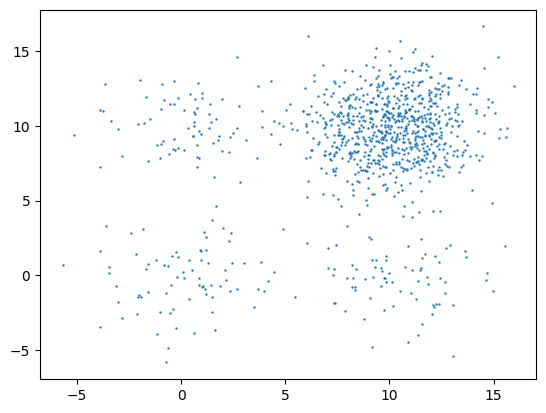

In [194]:
import numpy as np
import matplotlib.pyplot as plt

X_clusters = np.loadtxt("clusters.txt")
plt.scatter(X_clusters[:,0], X_clusters[:,1], s=0.5)
plt.show()

#### a) Implementing $k$-means (8 pts)

Implement the $k$-means clustering algorithm. The parameter ``X`` is a 2D array of data points (like ``X_clusters`` that was loaded in the cell above) while the parameter ``k`` determines the number of clusters. 

In our version of the algorithm the user can decide which of the input data points should be chosen as  initial centroids. For this, the user can specify a list of ``init_points`` that contains several row indices of ``X`` s.t. the associated data points are the initial cluster centers.  If initial cluster centers are provided by the user, the input for ``k`` is ignored. If no initial cluster centers are specified (``init_points=None``), ``k`` cluster centers should be chosen randomly from the input data points. 

As a distance measure we utilize Euclidean distance. You may want to consider functions from the ``numpy.linalg`` module for efficient computation.

Your function should return a 1D array with cluster labels for each data point (``labels``) and a 2D array containing the coordinates of all final centroids (``centroids``). The cluster labels range from $1$ to $k$ (or from 1 to the number of given ``init_points``). Each entry in ``labels`` corresponds to one data point of the input data array (e.g. the first label corresponds to the first input data point). Similarly the first centroid ( = the first row) in ``centroids`` belongs to the cluster with label ``1``, the second centroid belongs to the cluster with label ``2``, and so on.

_Hint: you can test your implementation on the small example provided 2 cells below_

In [195]:
import numpy as np
from numpy.typing import NDArray
from typing import List, Union, Dict, Set, Tuple
from collections import defaultdict
import random

def nearest_points(data, centroids):
    nearest_pts = []
    for point in data:
        min_pt = float("inf")
        minpt_index = 0
        for i in range(len(centroids)):
            val = np.linalg.norm(point-centroids[i])
            if val < min_pt:
                min_pt = val
                minpt_index = i
        nearest_pts.append(minpt_index)
    return nearest_pts

def move_centroids(data, points):
    means = defaultdict(list)
    centers = []
    for center, point in zip(points, data):
        means[center].append(point)
    for points in means.values():
        centers.append(sum(points)/len(points))
    return centers


def k_means(X: NDArray[NDArray[float]], k: int = 2, init_points: List[int] = None) -> (NDArray[float], NDArray[NDArray[float]]):
    """
    :param X: numerical 2D numpy array, each row is a data point
    :param k: number of clusters, ignored if init_points is not None
    :param init_points: list of row indices which indicate the data points that the clusters are initialized with
             -> default is None, indicating that random points from the input data X are initialized as cluster centers
             -> if specified, k is chosen as the number of cluster centers, and input for k is ignored
    :return:
        - labels: 1D numpy array with cluster labels in {1,...,k}
        - centroids: 2D numpy array with k rows which denote the cluster centers
    """
    # your code here
  
    if init_points:
        k = len(init_points)
    else:
        init_points = random.choices(X, k=k)
    centroids = init_points.copy()
    nearest_pts = nearest_points(X, centroids)
    old_nearest_pts = None
    while nearest_pts != old_nearest_pts:
        centroids = move_centroids(X, nearest_pts)
        old_nearest_pts = nearest_pts
        nearest_pts = nearest_points(X, centroids)
    return [label + 1 for label in  nearest_pts], np.reshape(centroids,(-1,2))

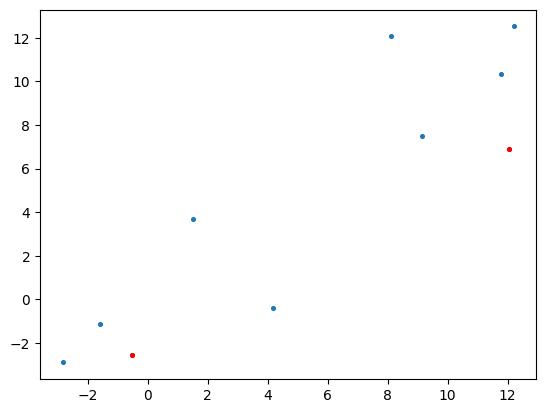

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
[[10.644632   9.867372 ]
 [ 0.1482398 -0.6514618]]


In [196]:
# small example to test your implementation

X_ex = np.concatenate((X_clusters[500:505], X_clusters[950:955]), axis=0)  # subset of data points from X
init_ex = [0, 5]  # initial centroids (index of points in X_ex)
plt.scatter(X_ex[:,0], X_ex[:,1], s=7)  # plot data points
plt.scatter(X_ex[init_ex,0], X_ex[init_ex,1], s=7, c='r')  # highlight initial centroids
plt.show()

labels, centroids = k_means(X_ex, k=2, init_points=init_ex)
print(labels) 
# [1. 1. 1. 1. 1. 2. 2. 2. 2. 2.]

print(centroids)
#[[10.644632   9.867372 ]
# [ 0.1482398 -0.6514618]]

#### b) Application with Random Initialization (3 pts)

Apply your implementation from a) 10 times on the data from clusters.txt, choosing $k = 4$ and random initalization of cluster centers. For each run, create a scatter plot of the data as above, with different colors indicating the different clusters. Do you think the resulting clusters are appropriate in most of these 10 runs?
Write your answer, including a brief explanation, into cell __A3b)__!

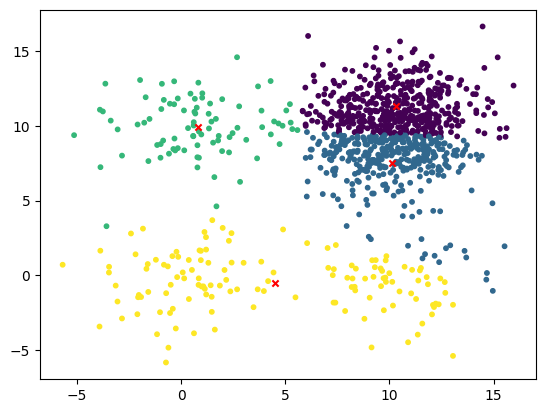

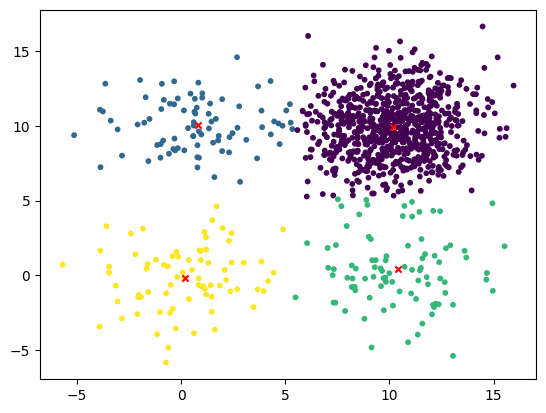

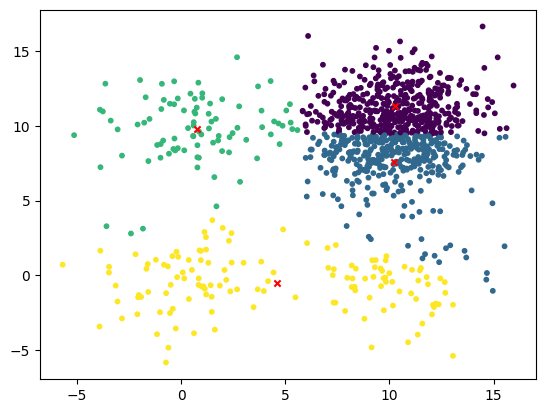

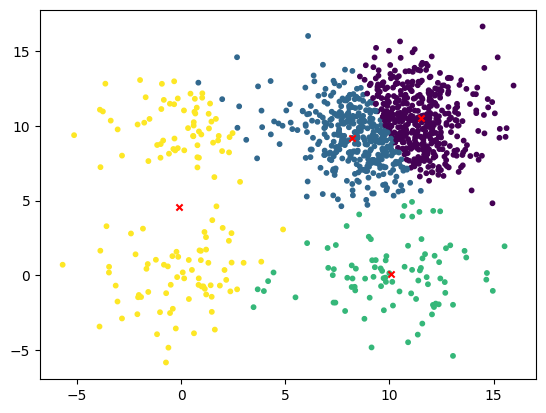

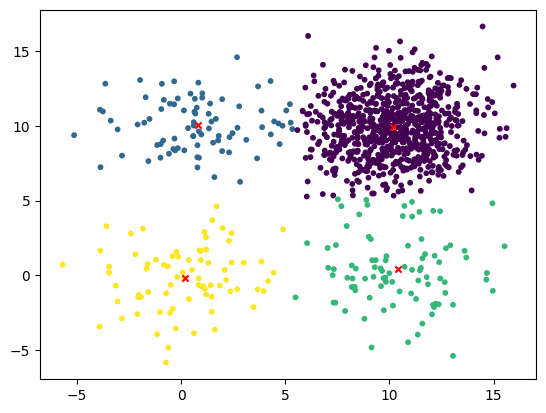

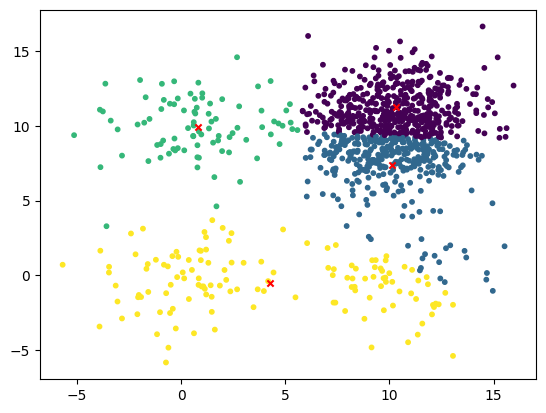

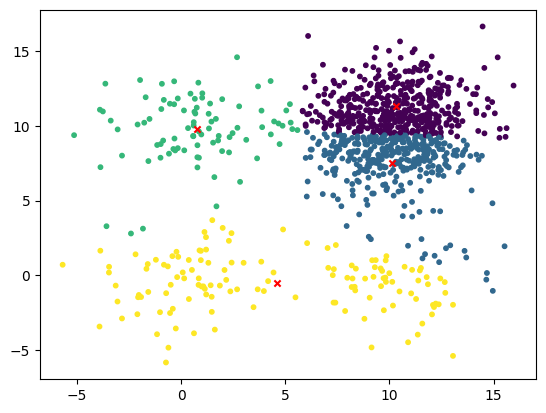

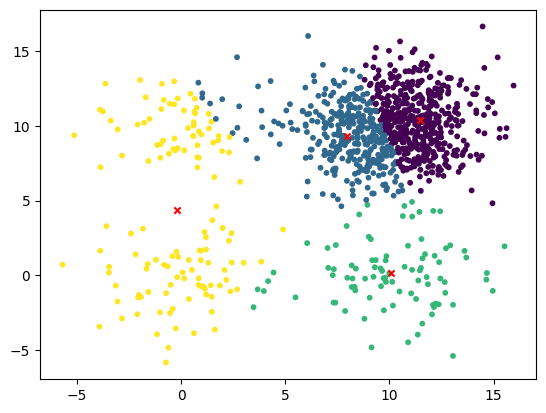

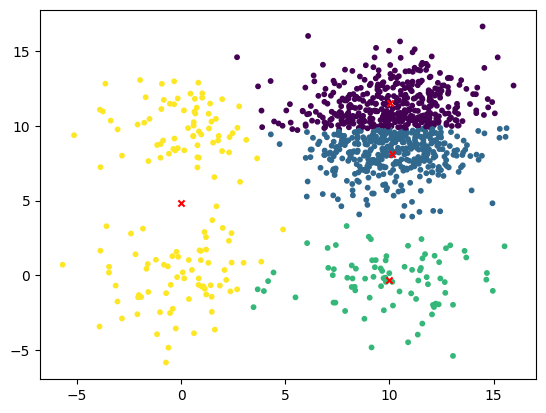

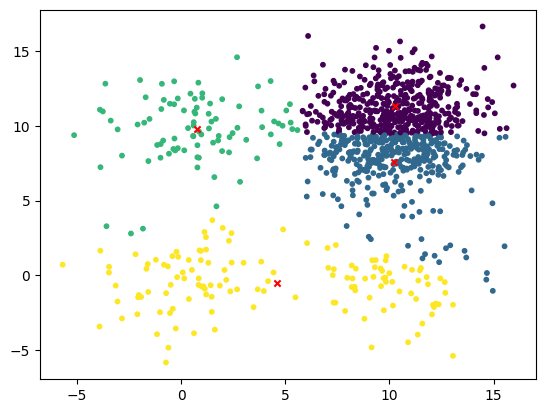

In [201]:
# your code here
for _ in range(10):
    clusters, centroids = k_means(X_clusters,4)
    plt.scatter(X_clusters[:,0], X_clusters[:,1], c=clusters, s=10)
    plt.scatter(centroids[:,0], centroids[:,1], s=20, c="red", marker="x")
    plt.show()

__A3b):__ _Out of the 10 runs, we can observe that only 2 runs seems to be appropriate. This might be because we are randomly selecting the initial points evrytime and then trying to find the best solution. If the initial points are very close this might lead to spliting a cluster into two._

#### c) k-means++ (6 pts)

To improve the performance of the $k$-means clustering algorithm, a common approach is to not initialize cluster centers completely at random, but rather to make sure that the initial cluster centers are relatively far away from each other. A very popular initialization scheme is provided by the $k$-means++ algorithm, which works as follows:

Let $X$ be the set of data points, and $\mathcal{D}(x)$ denote the distance between the data point x and the nearest centroid that has already been chosen. Then, the k-means++ initialization consists of the following steps.
1. Choose a centroid $c_1$ uniformly at random from $X$.
2. Choose a new centroid $c_i$ from the set of data points $x \in X$ with probability $$p(x) = \frac{D(x)^2}{\sum_{x\in X} D(x)^2}$$
3. Repeat Step 2 until we have taken $k$ centers altogether.

Implement this initialization scheme in a function ```init_k_means_pp```, and an extra helper function ```calc_probability``` which computes the probability distribution in step 2, using the signatures in the cells below. Use Euclidean distance to measure distance between any pair of points in the data. 

In [198]:
def calc_probability(X: NDArray[NDArray[float]], curr_centroids: List[int]) -> NDArray[float]:
    """
    :param X: 2D numpy array, consisting of all the data points we want to cluster
    :param curr_centroids: list of row indices which indicate the points that are already chosen as cluster centers
    :return: 1D numpy array, containing the probabilities of each point in the data to be chosen as next cluster center
    """
    # your code here
    distances = [] 
    for point in X:
        minDis = float("inf")
        for center in curr_centroids:
            dist = np.sqrt(np.sum(point-center)**2)
            if dist < minDis:
                minDis = dist
        distances.append(minDis)
    distances_sqr = [distance**2  for distance in distances ]
    sum_dist  = np.sum(distances_sqr, axis = 0)
    return [dist/sum_dist for dist in distances_sqr]

In [199]:
def init_k_means_pp(X: NDArray[NDArray[float]], k: int) -> List[int]:
    """
    :param X: numerical 2D numpy array, where each row represents a data point
    :param k: number of clusters 
    :return: list of k row indices which indicate the data points that the clusters are initialized with 
             -> used as init_points for k_means()
    """
    # your code here
    center_points = []
    centroids = X[np.random.randint(0,X.shape[0],size=1,dtype='int')]
    center_points.append(centroids)
    while k > 1:
        probabilities = calc_probability(X, center_points)
        index  = np.random.choice(X.shape[0],1,p=probabilities)
        center_points.append(X[index])
        k -= 1
    return center_points

#### d) Improved Clustering (3 pts)

Apply the initializations from c) and the implementation from a) to rerun the experiment from b). That is, run the $4$-means clustering algorithm ten times on the given data, using the initialization from ```k_means_pp```, and create a scatter plot of each clustering using different colors for different clusters. Do you observe a different behavior than in task b)? Write your answer into cell **3d)**!

[array([[12.6697 ,  7.43822]]), array([[-2.8331 ,  8.01174]]), array([[-2.09528, -2.6127 ]]), array([[ 7.20409, 10.0351 ]])]


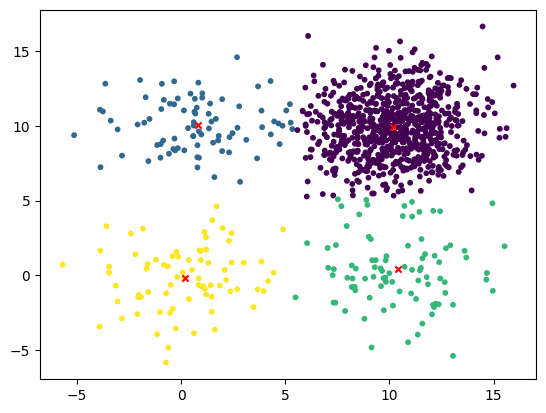

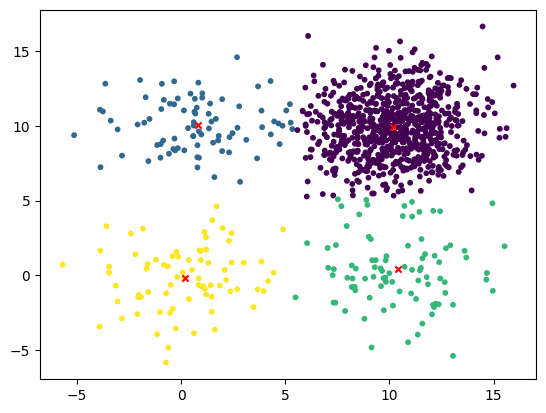

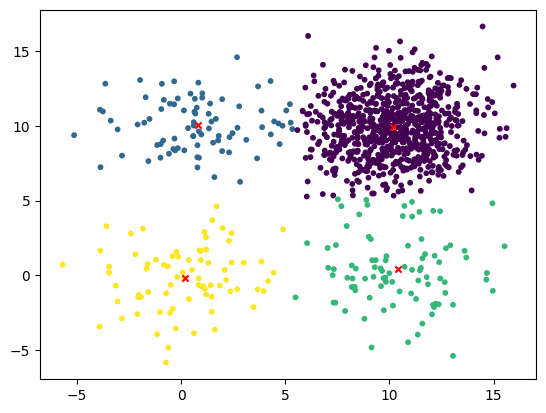

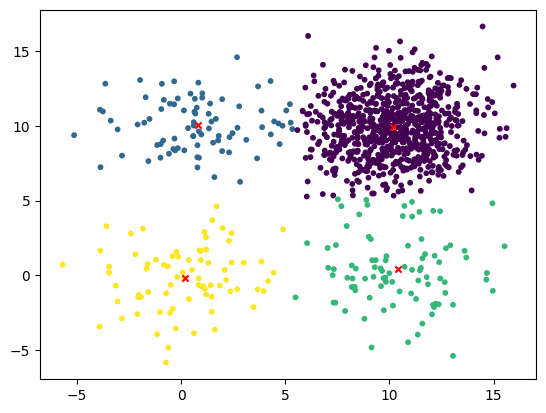

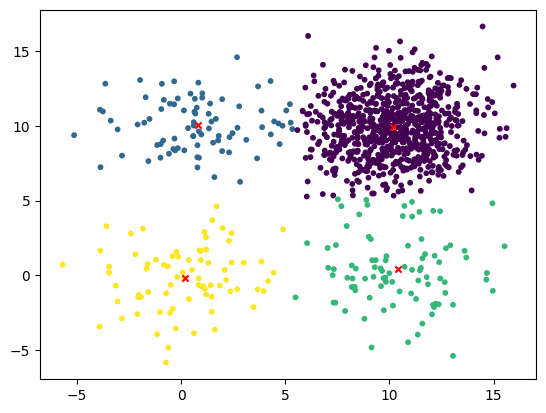

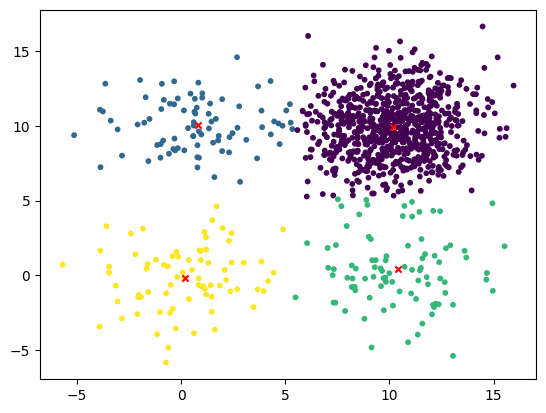

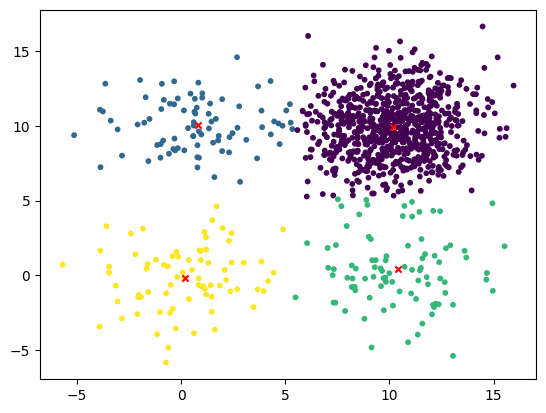

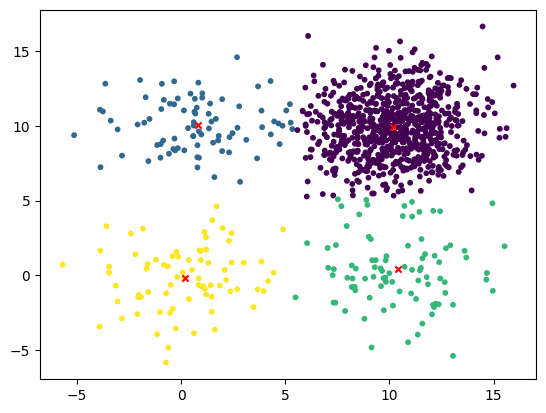

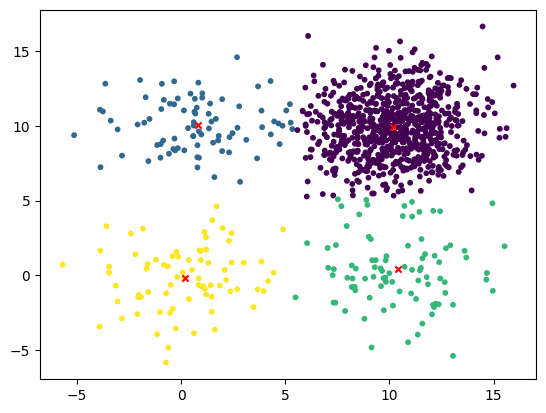

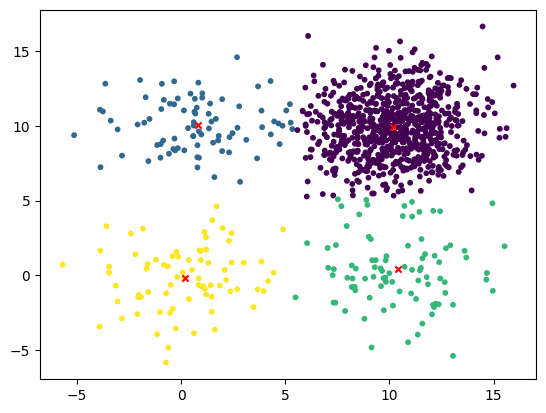

In [200]:
# your code here
 # initialization 
init_centroids = init_k_means_pp(X_clusters,4)     
print(init_centroids) 
for _ in range(10):
    clusters, centroids = k_means(X_clusters,4, init_centroids)
    plt.scatter(X_clusters[:,0], X_clusters[:,1], c=clusters, s=10)
    plt.scatter(centroids[:,0], centroids[:,1], s=20, c="red", marker="x")
    plt.show()

__A3d):__ _Using kmeans++ initial points, the data is well clustered as we are trying to find the efficient centers which are distributed over the data it is more likely to have within cluster sum of square than random initialization. This also seems to be quick than the previous implementation as we are finding the best inital points which makes k-means algorithm easy to find the best clusters._